In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load training dataset
df = pd.read_csv("../data/raw/mitbih_train.csv", header=None)

df.head()


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.shape



(87554, 188)

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

print("Signal shape:", X.shape)
print("Labels shape:", y.shape)


Signal shape: (87554, 187)
Labels shape: (87554,)


In [10]:
y.value_counts()


187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

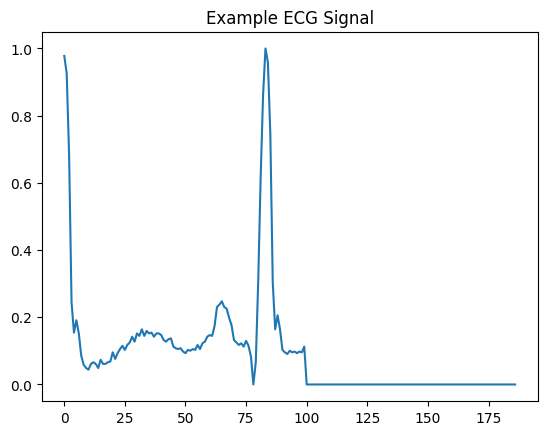

In [11]:
plt.plot(X.iloc[0])
plt.title("Example ECG Signal")
plt.show()



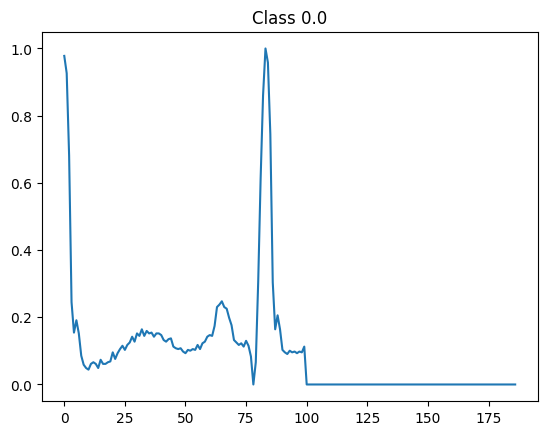

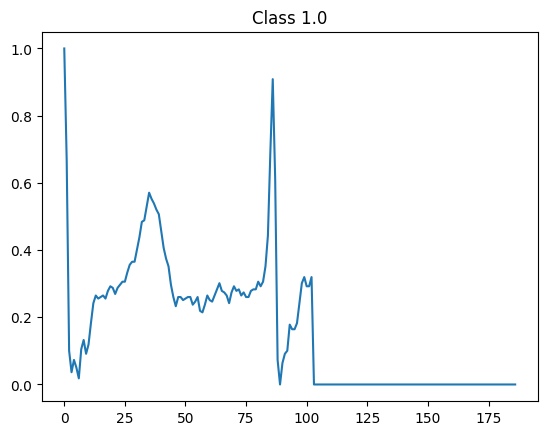

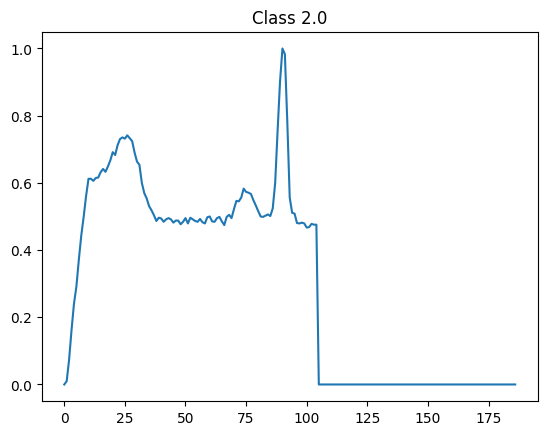

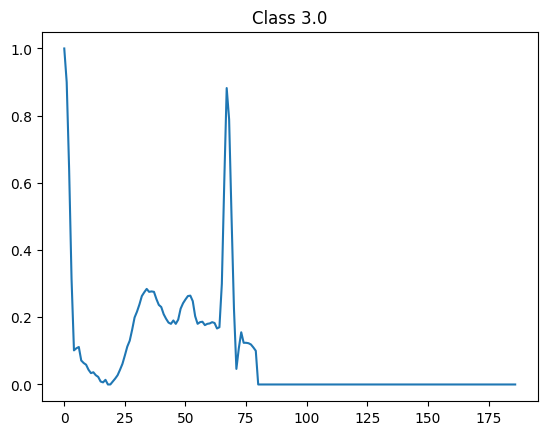

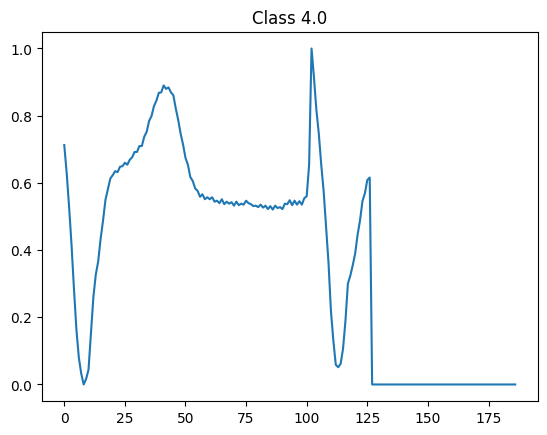

In [12]:
for label in y.unique():
    sample = X[y == label].iloc[0]
    plt.plot(sample)
    plt.title(f"Class {label}")
    plt.show()


In [13]:
df.dtypes


0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

In [15]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

classes = np.unique(y)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y
)

class_weights_dict = dict(zip(classes, class_weights))

class_weights_dict


{np.float64(0.0): np.float64(0.24162492583240192),
 np.float64(1.0): np.float64(7.877103013945119),
 np.float64(2.0): np.float64(3.0253628196268143),
 np.float64(3.0): np.float64(27.317940717628705),
 np.float64(4.0): np.float64(2.7228735810915876)}

In [16]:
df.iloc[0, :-1].to_csv("test_signal.csv", header=False, index=False)
